In [ ]:
#importing necessary libraries

import pandas as pd
import statistics
import numpy as np
from sklearn import datasets
from mlxtend.plotting.decision_regions import plot_decision_regions
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
target = iris_dataset.target
classes = pd.unique(target)
no_of_classes= len(classes)

LOGISTIC REGRESSION USING ONE-HOT ENCODING

In [ ]:
#one hot encoding
def get_one_hot(targets, n0_classes):
    res = np.eye(n0_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[n0_classes])

In [ ]:
#splitting the data into 90% of training and 10% of testing
from sklearn.model_selection import train_test_split
target_T=get_one_hot(iris_dataset.target,no_of_classes)
x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data,iris_dataset.target,test_size=0.1)
target_T=get_one_hot(y_train,no_of_classes)

In [ ]:
def z_(x,w1,bias):
  return np.dot(x,w1.T) +bias
def softmax_(z):
  return (np.exp(z)/(np.sum(np.exp(z),axis=1)[:,None]))
def gradient_W(y_hat,y,x):
   return np.dot(x.T,(y_hat - y))
def gradient_B(y_hat,y):
   return np.sum(y_hat - y)
def loss(y_hat,y,x):
  return -1*(np.sum(y * np.log(y_hat)))


In [ ]:
class logistic_regression():
    def fit(self,X,Y,lr,lam,n):
        w1=np.zeros([3,X.shape[1]])
        w1=w1.T
        bias = np.zeros([1,no_of_classes])
        print(bias)
        n0_of_samples=X.shape[0]
        learning_rate=lr
        for a in range(n):
            z=np.dot(X,w1) +bias
            sigma=softmax_(z)
            cost_func= loss(sigma,Y,X)/n0_of_samples
            grad_W=gradient_W(sigma,Y,X)/n0_of_samples
            grad_B=gradient_B(sigma,Y)/n0_of_samples
            w1=w1-learning_rate*grad_W*lam
            b= bias-(learning_rate*grad_B)
        print("LOSS = ",cost_func)
        print("GRADIENT DESCENT of Slope= ",+grad_W)
        print("GRADIENT DESCENT of intercept = ",+grad_B)
        return w1,b
    def predict(self,X):
        y_hat =np.dot(X,W.T)+ B
        return np.argmax(y_hat, axis=1)



In [ ]:
#model 1
model1_LOG=logistic_regression()
W,B=model1_LOG.fit(x_train[:,[0,1]],target_T,0.002,1,100000)
W=W.T
print("THE PARAMETERS W,B")
print("W = ",W,"B = ",B)
Y1_LOG=model1_LOG.predict(x_test[:,[0,1]])
print(Y1_LOG)
print(y_test)

[[0. 0. 0.]]
LOSS =  0.5072069007728702
GRADIENT DESCENT of Slope=  [[ 0.00403903 -0.00181749 -0.00222154]
 [-0.00710196  0.00310194  0.00400002]]
GRADIENT DESCENT of intercept =  -2.4671622769447924e-18
THE PARAMETERS W,B
W =  [[-2.71781135  4.86140297]
 [ 1.13839254 -1.9632484 ]
 [ 1.57941881 -2.89815457]] B =  [[4.93432455e-21 4.93432455e-21 4.93432455e-21]]
[0 1 2 1 1 0 2 1 1 0 2 1 2 2 0]
[0 1 2 2 1 0 2 2 1 0 1 2 2 1 0]


Text(0, 0.5, 'sepal width [cm]')

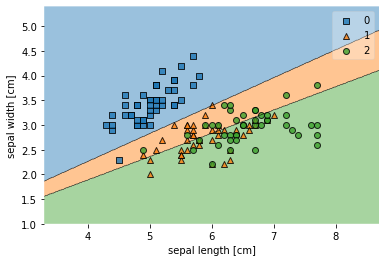

In [ ]:
#@title Default title text
plot_decision_regions(x_train[:,[0,1]],y_train,clf =model1_LOG)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')

In [ ]:
# Model 2
model2_LOG=logistic_regression()
W,B=model2_LOG.fit(x_train[:,[2,3]],target_T,0.0000555,5123,10000)
W=W.T
print("THE PARAMETERS W,B")
print("W = ",W,"B = ",B)
Y2_LOG=model2_LOG.predict(x_test[:,[2,3]])
print(Y2_LOG)
print(y_test)

[[0. 0. 0.]]
LOSS =  0.5031394355977586
GRADIENT DESCENT of Slope=  [[-2.02862770e-04  9.17840767e-05  1.11078694e-04]
 [ 7.88435747e-04 -3.65422075e-04 -4.23013672e-04]]
GRADIENT DESCENT of intercept =  -8.22387425648264e-18
THE PARAMETERS W,B
W =  [[  3.94865672 -14.91584881]
 [ -0.97923196   4.44236817]
 [ -2.96942476  10.47348064]] B =  [[4.56425021e-22 4.56425021e-22 4.56425021e-22]]
[0 2 1 2 2 0 2 1 1 1 1 2 2 1 0]
[0 1 2 2 1 0 2 2 1 0 1 2 2 1 0]


Text(0, 0.5, 'petal width [cm]')

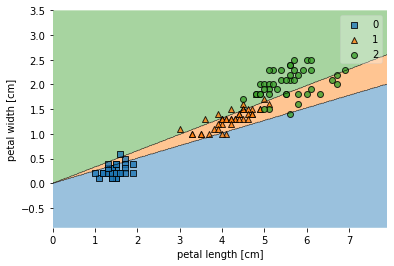

In [ ]:
#@title Default title text
plot_decision_regions(x_train[:,[2,3]],y_train,clf =model2_LOG)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')

In [ ]:
#Model 3
model3_LOG=logistic_regression()
W,B=model3_LOG.fit(x_train,target_T,0.1,1,10000)
W=W.T
print("THE PARAMETERS W,B")
print("W = ",W,"B = ",B)
Y3_LOG=model3_LOG.predict(x_test)
print(Y3_LOG)
print(y_test)
print("******************************************************************************************************")


[[0. 0. 0.]]
LOSS =  0.0766001820591336
GRADIENT DESCENT of Slope=  [[-4.16841778e-04 -2.45127740e-04  6.61969518e-04]
 [-8.09254539e-04 -2.99264818e-04  1.10851936e-03]
 [ 1.07046784e-03  7.75521586e-05 -1.14802000e-03]
 [ 5.89052384e-04  7.84482823e-04 -1.37353521e-03]]
GRADIENT DESCENT of intercept =  1.7475732795025613e-17
THE PARAMETERS W,B
W =  [[ 1.82652296  3.84738655 -5.11103128 -2.5108596 ]
 [ 1.30443957  0.60564007 -0.34137955 -2.85779195]
 [-3.13096252 -4.45302662  5.45241083  5.36865155]] B =  [[-1.74757328e-18 -1.74757328e-18 -1.74757328e-18]]
[0 1 2 2 1 0 2 1 1 0 1 2 2 1 0]
[0 1 2 2 1 0 2 2 1 0 1 2 2 1 0]
******************************************************************************************************





LINEAR DISCRIMINANT ANALYSIS

In [ ]:
classes = pd.unique(target)
no_of_classes= len(classes)
def meanMAT(X):
  mean_mat=[]
  mean_matrix=np.zeros((no_of_classes,X.shape[1]))
  for i in range(no_of_classes):
    x_class=X[y_train==i]
    mean_vector=np.mean(x_class,axis=0)
    mean_mat.append(mean_vector)
  mean_matrix=mean_matrix+mean_mat
  return mean_matrix
def cov(X,a,b,c):
  n=[]
  for i in range(no_of_classes):
    n.append(len(X[y_train==i]))
  n=n/np.sum(n)
  covariance=((np.dot(a.T,a))*n[0])+((np.dot(b.T,b))*n[1])+((np.dot(c.T,c))*n[2])
  return covariance,n

In [ ]:
class LDA():
    def fit(self,X,Y):
        classes = pd.unique(target)
        no_of_classes= len(classes)
        mean_matrix=meanMAT(X)
        print("MEAN MATRIX",mean_matrix)
        total_mean=np.mean(X,axis=0)
        mean_diff_class_0=total_mean-mean_matrix[0]
        mean_diff_class_1=total_mean-mean_matrix[1]
        mean_diff_class_2=X[Y==2]-mean_matrix[2]
        covarience_matrix,N=cov(X,mean_diff_class_0,mean_diff_class_1,mean_diff_class_2)
        print("COVARIANCE MATRIX",covarience_matrix)
        inv_cov=np.linalg.inv(covarience_matrix)
        w=np.zeros((no_of_classes,X.shape[1]))
        b=np.zeros((no_of_classes,1))
        for j in range(no_of_classes):
            w[j]=np.dot(mean_matrix[j],inv_cov)
            b[j]=np.log(N[j])-((0.5)*np.dot(w[j],mean_matrix[j].T))
        return w,b
   #W,B=fit(x_train,y_train)

    def predict(self,X):
        y_hat =np.dot(X,W.T)+B.T
        return np.argmax(y_hat, axis=1)

In [ ]:
model1_LDA=LDA()
W,B=model1_LDA.fit(x_train[:,[0,1]],y_train)
print("THE PARAMETERS W,B")
print("W  =  ",W,"B =  ",B)

MEAN MATRIX [[5.01304348 3.42608696]
 [5.90444444 2.75111111]
 [6.59318182 2.96136364]]
COVARIANCE MATRIX [[5.67216538 1.33749872]
 [1.33749872 1.68816538]]
THE PARAMETERS W,B
W  =   [[0.49834773 1.63464287]
 [0.80754507 0.98984415]
 [0.92075037 1.0246989 ]] B =   [[-5.12596711]
 [-4.84425039]
 [-5.67367546]]


In [ ]:
Y1_LDA=model1_LDA.predict(x_test[:,[0,1]])
print(Y1_LDA)
print(y_test)

[0 2 1 1 1 0 1 2 1 0 1 2 2 2 0]
[0 1 2 2 1 0 2 2 1 0 1 2 2 1 0]


Text(0, 0.5, 'petal width [cm]')

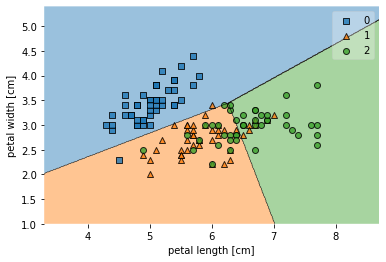

In [ ]:
plot_decision_regions(x_train[:,[0,1]],y_train,clf =model1_LDA)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')

In [ ]:
model2_LDA=LDA()
W,B=model1_LDA.fit(x_train[:,[2,3]],y_train)
print("THE PARAMETERS W,B")
print("W  =  ",W,"B =  ",B)

MEAN MATRIX [[1.45869565 0.24130435]
 [4.22       1.32      ]
 [5.55       2.01818182]]
COVARIANCE MATRIX [[6.55942997 2.96446701]
 [2.96446701 3.23350404]]
THE PARAMETERS W,B
W  =   [[ 0.32212193 -0.22069417]
 [ 0.78347977 -0.31006608]
 [ 0.96306801 -0.25879093]] B =   [[-1.28494508]
 [-2.54711098]
 [-3.5324553 ]]


In [ ]:
Y2_LDA=model2_LDA.predict(x_test[:,[2,3]])
print(Y2_LDA)
print(y_test)

[0 1 2 2 1 0 2 2 1 0 1 2 2 1 0]
[0 1 2 2 1 0 2 2 1 0 1 2 2 1 0]


Text(0, 0.5, 'petal width [cm]')

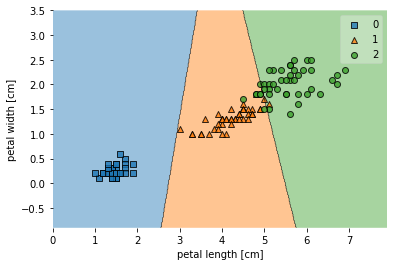

In [ ]:
plot_decision_regions(x_train[:,[2,3]],y_train,clf =model2_LDA)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')

In [ ]:
model3_LDA=LDA()
W,B=model1_LDA.fit(x_train,y_train)
print("THE PARAMETERS W,B")
print("W  =  ",W,"B =  ",B)

MEAN MATRIX [[5.01304348 3.42608696 1.45869565 0.24130435]
 [5.90444444 2.75111111 4.22       1.32      ]
 [6.59318182 2.96136364 5.55       2.01818182]]
COVARIANCE MATRIX [[7.7957435  3.46107683 6.60841017 3.27107683]
 [3.46107683 3.8117435  3.29048424 3.17833609]
 [6.60841017 3.29048424 6.86426202 3.26929906]
 [3.27107683 3.17833609 3.26929906 3.53833609]]
THE PARAMETERS W,B
W  =   [[ 2.15880869  2.89931742 -1.95956417 -2.72131544]
 [ 1.16613953  1.15179705 -0.41341747 -1.35762818]
 [ 0.80845721  0.70707427  0.13943673 -0.94098576]] B =   [[-9.6968546 ]
 [-4.35733069]
 [-4.27058661]]


In [ ]:
Y3_LDA=model3_LDA.predict(x_test)
print(Y3_LDA)
print(y_test)

[0 1 2 2 1 0 2 1 1 0 1 2 2 1 0]
[0 1 2 2 1 0 2 2 1 0 1 2 2 1 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y3_LDA)

0.9333333333333333

2.3 TESTING

In [ ]:
print("ACTUAL TEST VALUES              ",y_test)
print("TESTED VALUES FOR MODEL 1 OF LOG",Y1_LOG)
print("TESTED VALUES FOR MODEL 2 OF LOG",Y2_LOG)
print("TESTED VALUES FOR MODEL 3 OF LOG",Y3_LOG)
print("TESTED VALUES FOR MODEL 1 OF LDA",Y1_LDA)
print("TESTED VALUES FOR MODEL 1 OF LDA",Y2_LDA)
print("TESTED VALUES FOR MODEL 1 OF LDA",Y3_LDA)

ACTUAL TEST VALUES               [0 1 2 2 1 0 2 2 1 0 1 2 2 1 0]
TESTED VALUES FOR MODEL 1 OF LOG [0 1 2 1 1 0 2 1 1 0 2 1 2 2 0]
TESTED VALUES FOR MODEL 2 OF LOG [0 2 1 2 2 0 2 1 1 1 1 2 2 1 0]
TESTED VALUES FOR MODEL 3 OF LOG [0 1 2 2 1 0 2 1 1 0 1 2 2 1 0]
TESTED VALUES FOR MODEL 1 OF LDA [0 2 1 1 1 0 1 2 1 0 1 2 2 2 0]
TESTED VALUES FOR MODEL 1 OF LDA [0 1 2 2 1 0 2 2 1 0 1 2 2 1 0]
TESTED VALUES FOR MODEL 1 OF LDA [0 1 2 2 1 0 2 1 1 0 1 2 2 1 0]


In [ ]:
print("                                          ACCURACY")
print("                  LOGISTIC REGRESSION                LINEAR DISCRIMINANT ANALYSIS")
print("MODEL 1          ",accuracy_score(y_test, Y1_LOG),"                              ",accuracy_score(y_test, Y1_LDA))
print("MODEL 2          ",accuracy_score(y_test, Y2_LOG),"                              ",accuracy_score(y_test, Y2_LDA))
print("MODEL 3          ",accuracy_score(y_test, Y3_LOG),"                              ",accuracy_score(y_test, Y3_LDA))





                                          ACCURACY
                  LOGISTIC REGRESSION                LINEAR DISCRIMINANT ANALYSIS
MODEL 1           0.6666666666666666                                0.6666666666666666
MODEL 2           0.6666666666666666                                1.0
MODEL 3           0.9333333333333333                                0.9333333333333333
